Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



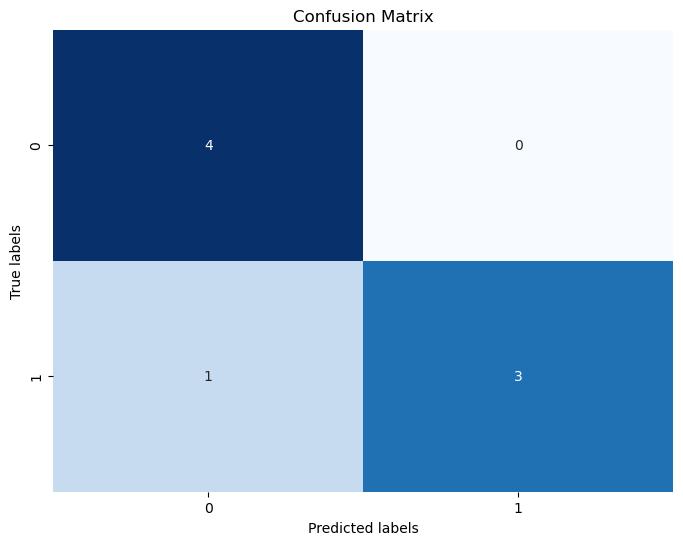

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your training and testing datasets
train_data = pd.read_csv("G:\\train.csv")
test_data = pd.read_csv("G:\\test.csv")

# Preprocessing - Drop problematic columns if needed
# Specify the actual column names to drop, or remove these lines if not needed
columns_to_drop = ['column_name_1', 'column_name_2']
train_data = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target variable for training data
X_train = train_data.drop(columns=['class'])
y_train = train_data['class']

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to original string representations
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print("Accuracy:", accuracy)
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.875
Cohen's Kappa: 0.75
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



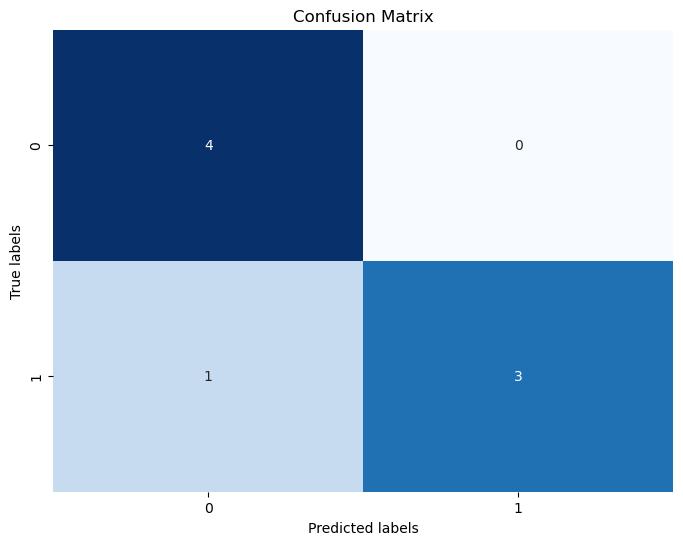

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your training and testing datasets
train_data = pd.read_csv("G:\\train.csv")
test_data = pd.read_csv("G:\\test.csv")

# Preprocessing - Drop problematic columns if needed
# Specify the actual column names to drop, or remove these lines if not needed
columns_to_drop = ['column_name_1', 'column_name_2']
train_data = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target variable for training data
X_train = train_data.drop(columns=['class'])
y_train = train_data['class']

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to original string representations
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Cohen's kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Print accuracy, kappa, and classification report
print("Accuracy:", accuracy)
print("Cohen's Kappa:", kappa)
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


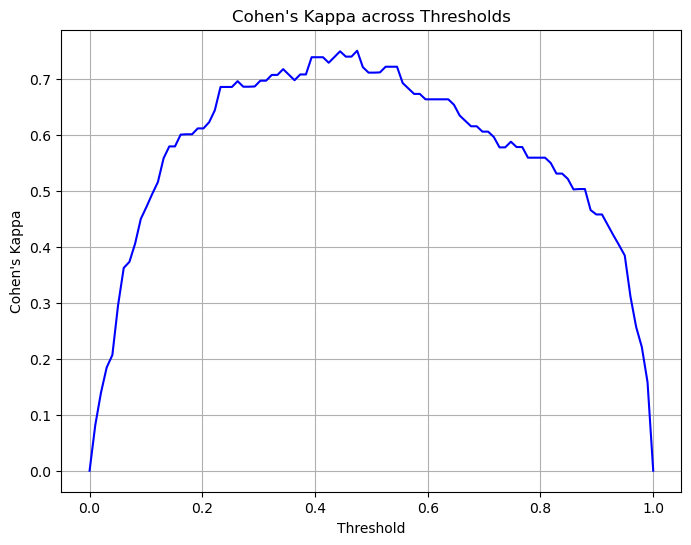

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


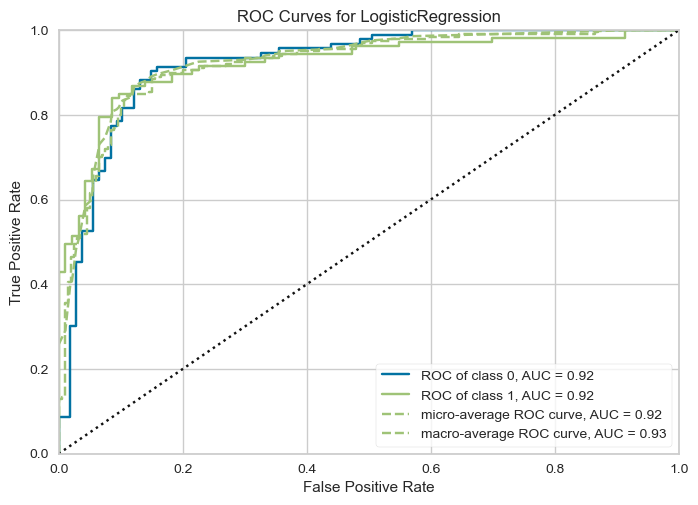

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import cohen_kappa_score
from yellowbrick.classifier import ROCAUC

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Instantiate the visualizer with the logistic regression model
visualizer = ROCAUC(model, classes=['0', '1'], micro=True, macro=True)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw the ROC curve and AUC
visualizer.show()


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



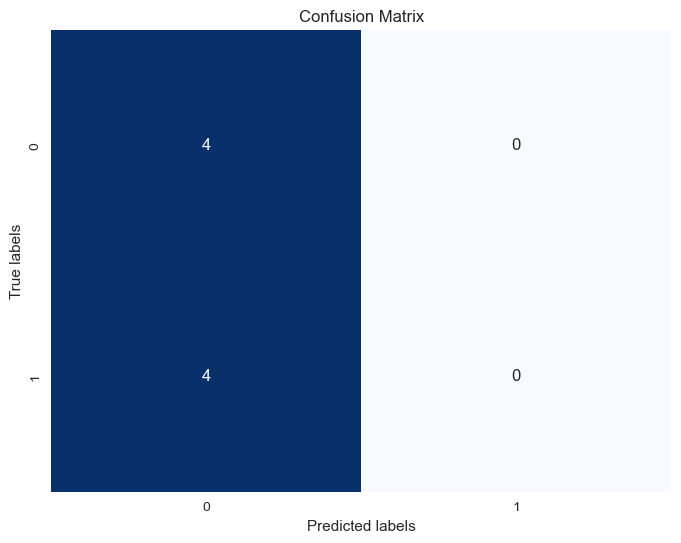

In [10]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your training and testing datasets
train_data = pd.read_csv("G:\\train.csv")
test_data = pd.read_csv("G:\\test.csv")

# Preprocessing - Drop problematic columns if needed
# Specify the actual column names to drop, or remove these lines if not needed
columns_to_drop = ['column_name_1', 'column_name_2']
train_data = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target variable for training data
X_train = train_data.drop(columns=['class'])
y_train = train_data['class']

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to original string representations
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print("Accuracy:", accuracy)
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


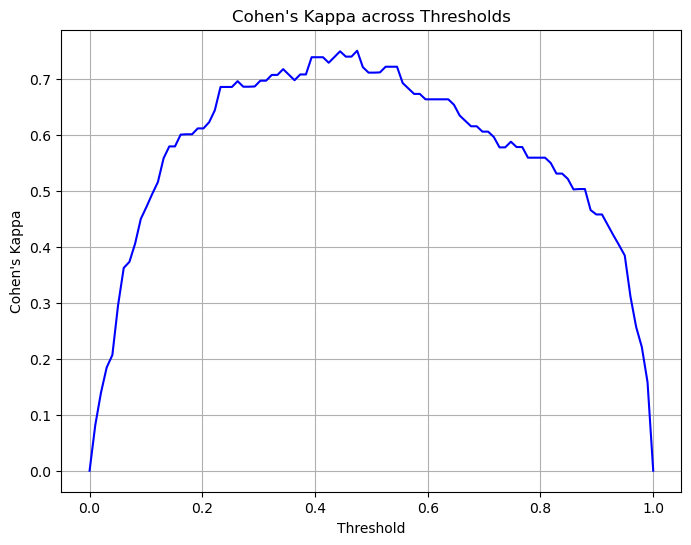

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


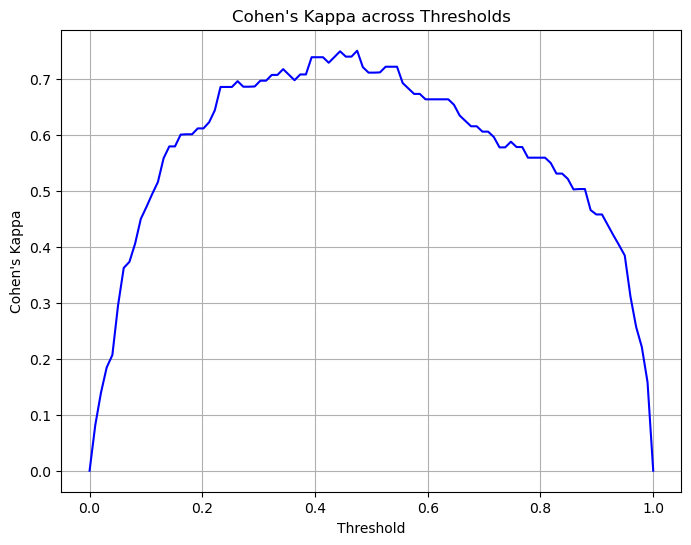

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


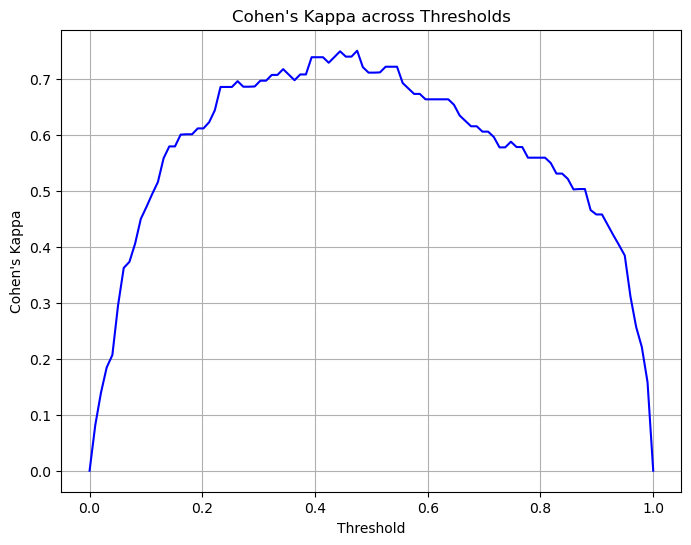

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


In [6]:
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Find the threshold with maximum Cohen's Kappa
max_kappa_index = np.argmax(kappas)
max_kappa_threshold = thresholds[max_kappa_index]
max_kappa_value = kappas[max_kappa_index]

print("Maximum Cohen's Kappa:")
print("Threshold:", max_kappa_threshold)
print("Value:", max_kappa_value)


Maximum Cohen's Kappa:
Threshold: 0.494949494949495
Value: 0.8004191198483185
